# Rotation Forest for Big Data

Mario Juez-Gil <<mariojg@ubu.es>>, Álvar Arnaiz-González, Juan J. Rodríguez, Carlos López-Nozal, and César Ignacio García-Osorio.

**Affiliation:**\
Departamento de Ingeniería Informática\
Universidad de Burgos\
[ADMIRABLE Research Group](http://admirable-ubu.es/)\
Burgos\
Spain

## Experiments notebook

This notebook collects all the experimental results reported in the paper.

It should be noted that Bayesian test results **may show small differences with those reported in the paper**. This is because this notebook contains a **different run of the tests**, and such tests are not deterministic, i.e. the results of each run will show minimal variations.

In [1]:
import numpy as np
import baycomp_plotting as bplt
import pandas as pd
import baycomp as bc
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.cm as cm
import matplotlib

# reading results
res_algo_comparison  = pd.read_csv("results/rotf_vs_pcarde_vs_ranf.csv")
res_variants_comparison = pd.read_csv("results/rotf_variants.csv")
speedup_comparison = pd.read_csv("results/speedup.csv")

### Accuracy performance

The table with the all cv-folds mean accuracy results for each dataset, algorithm, and ensemble size.

Standard deviation is also shown.

In [2]:
gb = res_algo_comparison.groupby(["dataset", "algorithm", "num_rotations"])["accuracy"]
pd.concat([gb.mean().rename("mean accuracy"), gb.std().rename("std")], axis=1)

mean accuracy       std
dataset    algorithm num_rotations                         
covtype    pcard     10                  0.670125  0.008507
           ranf      100                 0.671710  0.002626
                     200                 0.672196  0.002928
                     500                 0.671309  0.002154
           rotf      10                  0.720819  0.003843
                     50                  0.723276  0.001602
                     100                 0.722798  0.001408
epsilon    pcard     10                  0.784002  0.001277
           ranf      100                 0.725562  0.003073
                     200                 0.726893  0.003328
                     500                 0.730216  0.003470
           rotf      10                  0.771924  0.009063
                     50                  0.801192  0.004433
                     100                 0.803273  0.002876
hepmass    pcard     10                  0.813327  0.003314
           ranf      100                 0.822102  0.000831
                     200                 0.821528  0.001246
                     500                 0.821876  0.000723
           rotf      10                  0.840573  0.003173
                     50                  0.844431  0.001163
                     100                 0.844210  0.001084
higgs      pcard     10                  0.583255  0.016568
           ranf      100                 0.675203  0.003074
                     200                 0.675839  0.002820
                     500                 0.676651  0.001068
           rotf      10                  0.681623  0.003331
                     50                  0.687010  0.001012
                     100                 0.688022  0.001011
poker-hand pcard     10                  0.507740  0.013601
           ranf      100                 0.514199  0.004011
                     200                 0.513216  0.002991
                     500                 0.511807  0.003069
           rotf      10                  0.624639  0.031971
                     50                  0.582188  0.011173
                     100                 0.572591  0.011648
susy       pcard     10                  0.726407  0.013365
           ranf      100                 0.776722  0.000478
                     200                 0.776663  0.000390
                     500                 0.776643  0.000129
           rotf      10                  0.783977  0.000920
                     50                  0.785916  0.000615
                     100                 0.785866  0.000599

### Bayesian hierarchical tests comparing algorithms

Comparing Rotation Forest 10, against the other ensemble methods tested (Random Forest 100/200/500, and PCARDE)

In [3]:
# preparing bidimensional arrays for bayesian hierarchical tests
pcard10 = res_algo_comparison[(res_algo_comparison["algorithm"] == "pcard") & (res_algo_comparison["num_rotations"] == 10)]["accuracy"].values.reshape((6,5))
rotf10 = res_algo_comparison[(res_algo_comparison["algorithm"] == "rotf") & (res_algo_comparison["num_rotations"] == 10)]["accuracy"].values.reshape((6,5))
ranf100 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 100)]["accuracy"].values.reshape((6,5))
ranf200 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 200)]["accuracy"].values.reshape((6,5))
ranf500 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 100)]["accuracy"].values.reshape((6,5))

#### Random Forest 100 (L) vs Rotation Forest 10 (R)

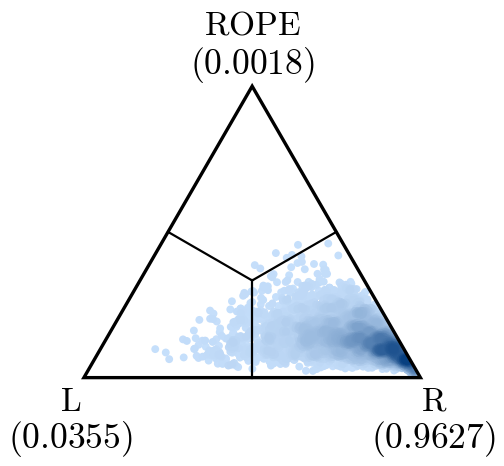

In [4]:
pos_ranf100_vs_rotf10 = bc.HierarchicalTest(ranf100, rotf10, rope=0.01, nsamples=50000)
bplt.tern(pos_ranf100_vs_rotf10)
plt.show()

#### Random Forest 200 (L) vs Rotation Forest 10 (R)

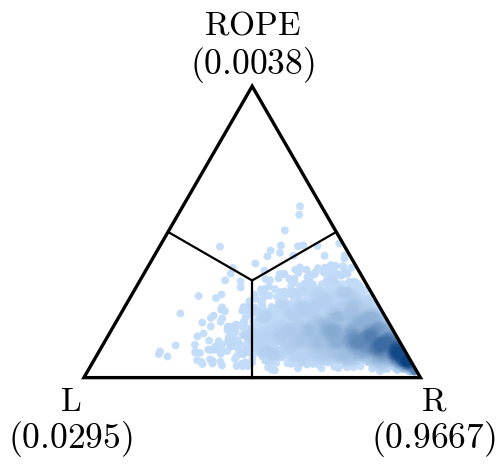

In [5]:
pos_ranf200_vs_rotf10 = bc.HierarchicalTest(ranf200, rotf10, rope=0.01, nsamples=50000)
bplt.tern(pos_ranf200_vs_rotf10)
plt.show()

#### Random Forest 500 (L) vs Rotation Forest 10 (R)

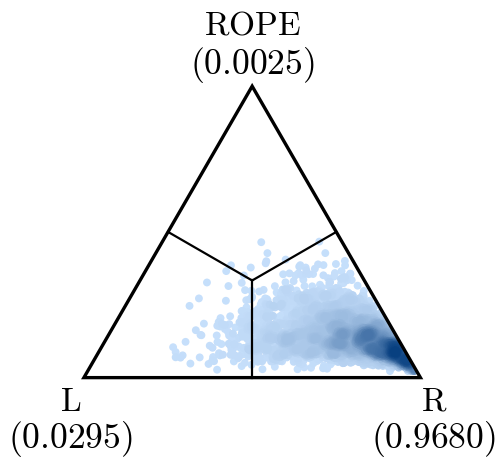

In [6]:
pos_ranf500_vs_rotf10 = bc.HierarchicalTest(ranf500, rotf10, rope=0.01, nsamples=50000)
bplt.tern(pos_ranf500_vs_rotf10)
plt.show()

#### PCARDE (L) vs Rotation Forest 10 (R)

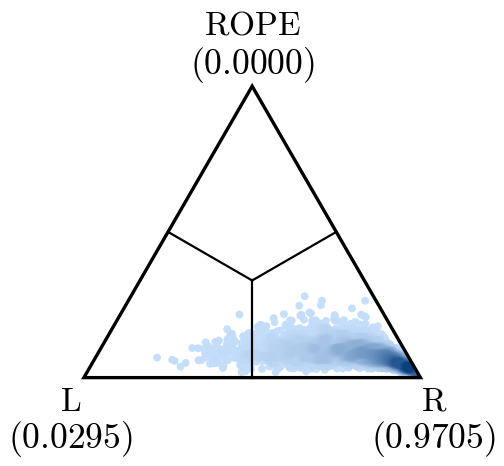

In [7]:
pos_pcard10_vs_rotf10 = bc.HierarchicalTest(pcard10, rotf10, rope=0.01, nsamples=50000)
bplt.tern(pos_pcard10_vs_rotf10)
plt.show()

### Bayesian correlated t-tests comparing algorithms for each dataset

Comparing Rotation Forest 10, against the other ensemble methods tested (Random Forest 100/200/500, and PCARDE)

In [8]:
# computing bayesian posteriors
posteriors = []
for dset in ("poker-hand", "covtype", "susy", "higgs", "hepmass", "epsilon"):
    pcard10 = res_algo_comparison[(res_algo_comparison["algorithm"] == "pcard") & (res_algo_comparison["num_rotations"] == 10) & (res_algo_comparison["dataset"] == dset)]["accuracy"].to_numpy()
    rotf10 = res_algo_comparison[(res_algo_comparison["algorithm"] == "rotf") & (res_algo_comparison["num_rotations"] == 10) & (res_algo_comparison["dataset"] == dset)]["accuracy"].to_numpy()
    ranf100 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 100) & (res_algo_comparison["dataset"] == dset)]["accuracy"].to_numpy()
    ranf200 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 200) & (res_algo_comparison["dataset"] == dset)]["accuracy"].to_numpy()
    ranf500 = res_algo_comparison[(res_algo_comparison["algorithm"] == "ranf") & (res_algo_comparison["num_rotations"] == 500) & (res_algo_comparison["dataset"] == dset)]["accuracy"].to_numpy()
    posterior_0 = bc.CorrelatedTTest(pcard10, rotf10, rope=0.01)
    posterior_1 = bc.CorrelatedTTest(ranf100, rotf10, rope=0.01)
    posterior_2 = bc.CorrelatedTTest(ranf200, rotf10, rope=0.01)
    posterior_3 = bc.CorrelatedTTest(ranf500, rotf10, rope=0.01)
    posteriors.append([posterior_0, posterior_1, posterior_2, posterior_3])

#### POKER-HAND

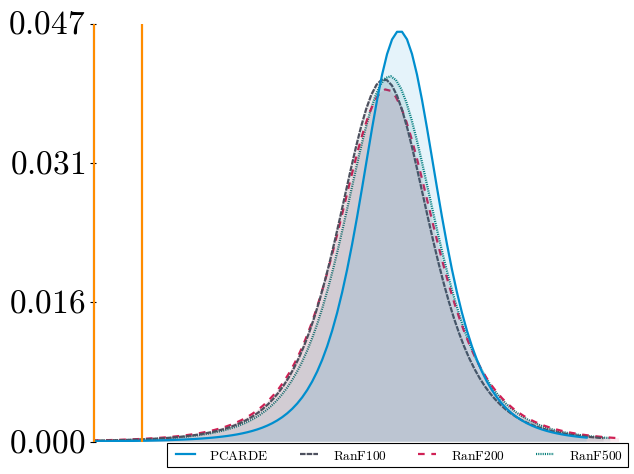

In [9]:
f = bplt.dens(posteriors[0][0], label="PCARDE")
f.add_posterior(posteriors[0][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[0][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[0][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

#### COVTYPE

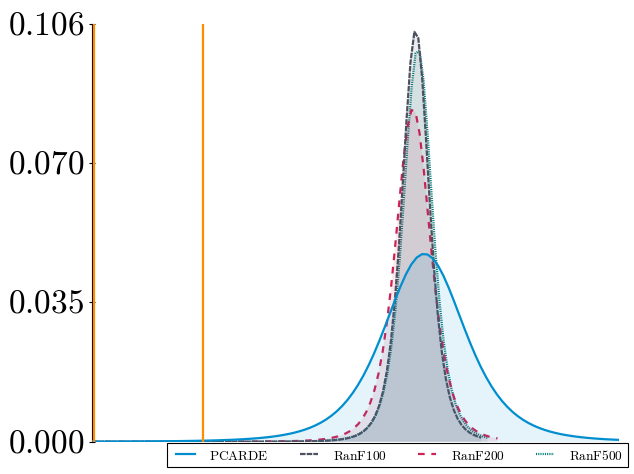

In [10]:
f = bplt.dens(posteriors[1][0], label="PCARDE")
f.add_posterior(posteriors[1][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[1][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[1][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

#### SUSY

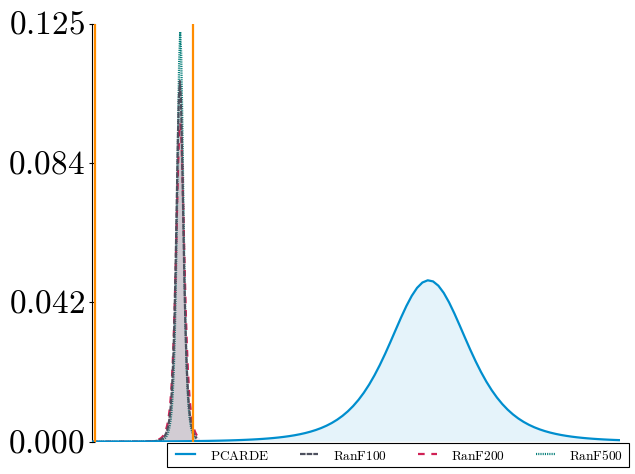

In [11]:
f = bplt.dens(posteriors[2][0], label="PCARDE")
f.add_posterior(posteriors[2][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[2][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[2][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

#### HIGGS

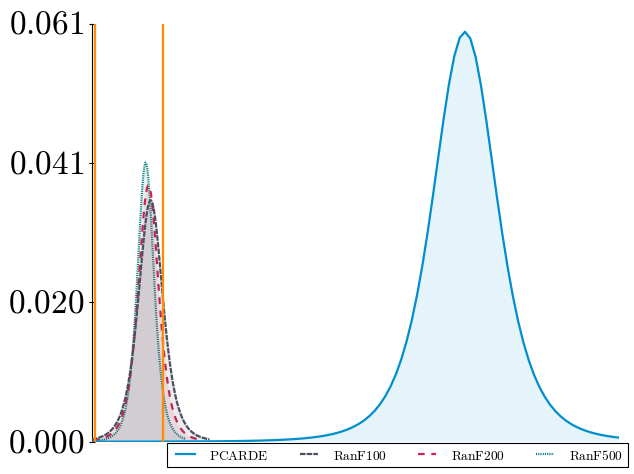

In [12]:
f = bplt.dens(posteriors[3][0], label="PCARDE")
f.add_posterior(posteriors[3][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[3][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[3][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

#### HEPMASS

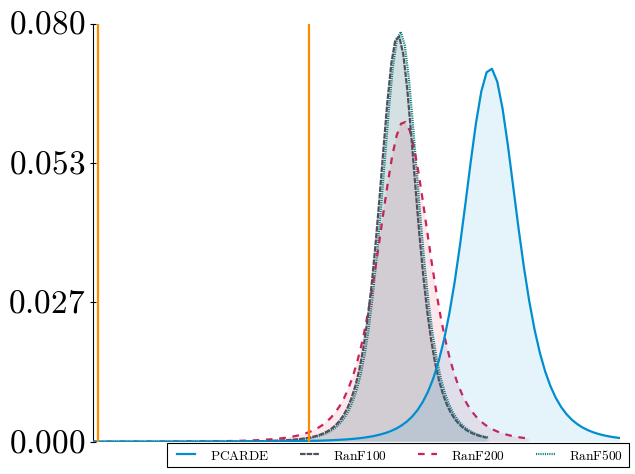

In [13]:
f = bplt.dens(posteriors[4][0], label="PCARDE")
f.add_posterior(posteriors[4][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[4][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[4][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

#### EPSILON

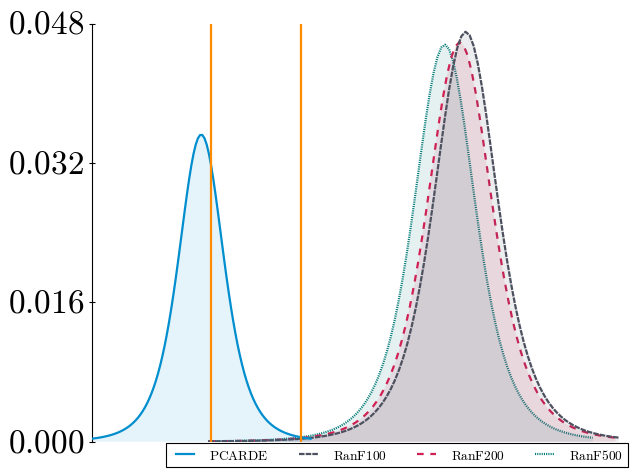

In [14]:
f = bplt.dens(posteriors[5][0], label="PCARDE")
f.add_posterior(posteriors[5][1], label="RanF100", ls=(0,(5,1)), color=bplt.Color.GRAY)
f.add_posterior(posteriors[5][2], label="RanF200", ls="--", color=bplt.Color.BORDEAUX)
f.add_posterior(posteriors[5][3], label="RanF500", ls=(0,(1,1)), color=bplt.Color.GREEN)
f.legend(loc="lower right", fontsize="medium", ncol=4)
plt.show()

### Execution time analysis

This part of the experimentation shows an analysis of training and prediction times of Rotation Forest.

Firstly a comparison against the other algorithms is performed. Then, a scalability analysis varying the number of worker nodes is shown.

In [15]:
def plot_times_algo_comp(dataset, training):
    # colors
    seablau4 = (0/255,169/255,224/255)
    seagruen4 = (10/255,144/255,134/255)
    bordeaux4 = (142/255,32/255,67/255)
    
    scale_factor, mult, col = (1e9, 1, "train_time") if training else (1e6, 1000, "predict_time")

    times = (res_algo_comparison[(res_algo_comparison["dataset"] == dataset)].groupby(["algorithm", "num_rotations"])[col].min()/scale_factor)[[4,0,1,2,3]]*mult
    labels = [r"$\mathrm{RotF}\ 10$", r"$\mathrm{PCARDE}\ 10$", r"$\mathrm{RanF}\ 100$", r"$\mathrm{RanF}\ 200$", r"$\mathrm{RanF}\ 500$"]
    x = np.arange(len(labels))
    width = 0.9

    fig, ax = plt.subplots(figsize=(3.5,5.5))
    ax.bar(x, times, width, color=[seablau4, seagruen4, bordeaux4, bordeaux4, bordeaux4], edgecolor = 'white')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha="center")
    ax.margins(0.05,0.05)

    for _x in x:
        ax.text(_x, times[_x]+times.max()*0.02, r"$%s$"%np.around(times[_x],1), horizontalalignment='center', fontsize=20)

    ax.set_yticklabels([])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('bottom')

    ax.tick_params(axis='both', which='major', labelsize=25, width=1, size=8, direction='inout')

    fig.tight_layout()
    fig.patch.set_facecolor('w')

#### Training times (in seconds) for POKER-HAND dataset

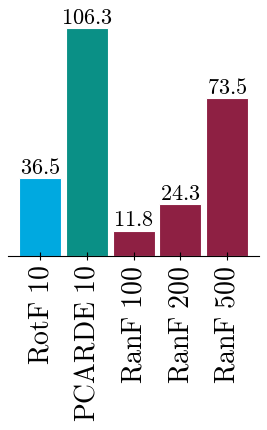

In [16]:
plot_times_algo_comp("poker-hand", True)

#### Training times (in seconds) for COVTYPE dataset

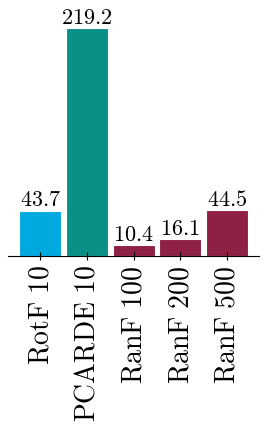

In [17]:
plot_times_algo_comp("covtype", True)

#### Training times (in seconds) for SUSY dataset

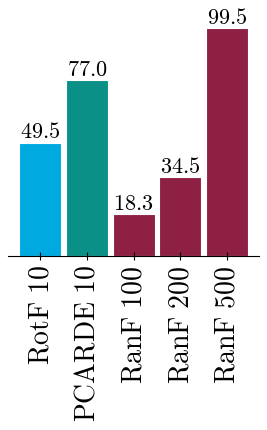

In [18]:
plot_times_algo_comp("susy", True)

#### Training times (in seconds) for HIGGS dataset

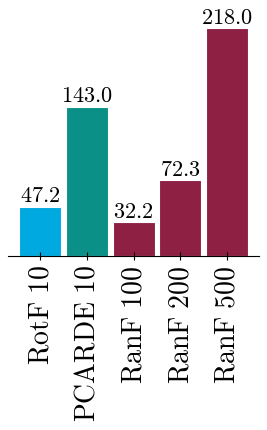

In [19]:
plot_times_algo_comp("higgs", True)

#### Training times (in seconds) for HEPMASS dataset

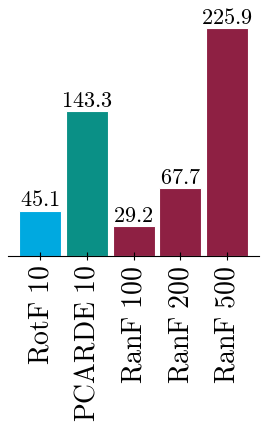

In [20]:
plot_times_algo_comp("hepmass", True)

#### Training times (in seconds) for EPSILON dataset

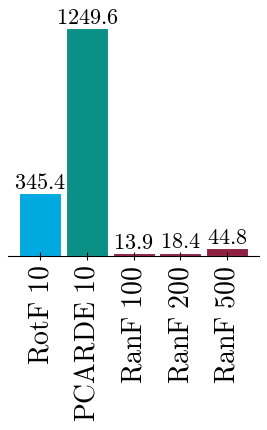

In [21]:
plot_times_algo_comp("epsilon", True)

#### Predicion times (in milliseconds) for POKER-HAND dataset

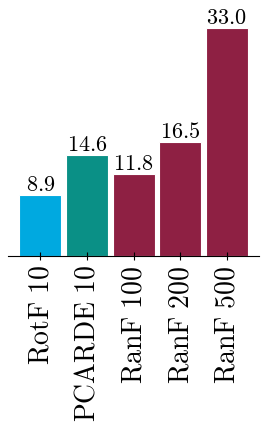

In [22]:
plot_times_algo_comp("poker-hand", False)

#### Predicion times (in milliseconds) for COVTYPE dataset

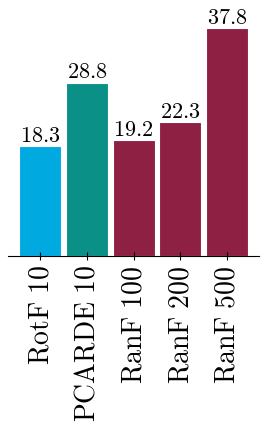

In [23]:
plot_times_algo_comp("covtype", False)

#### Predicion times (in milliseconds) for SUSY dataset

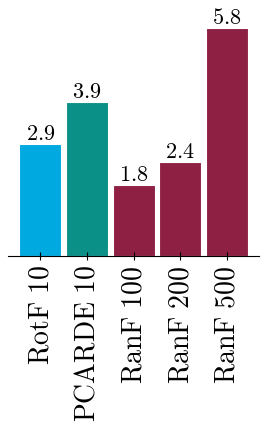

In [24]:
plot_times_algo_comp("susy", False)

#### Predicion times (in milliseconds) for HIGGS dataset

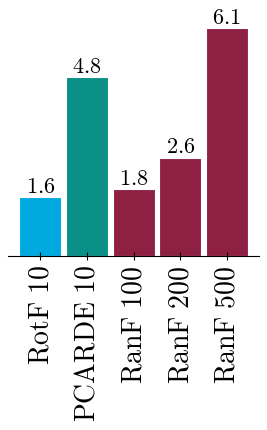

In [25]:
plot_times_algo_comp("higgs", False)

#### Predicion times (in milliseconds) for HEPMASS dataset

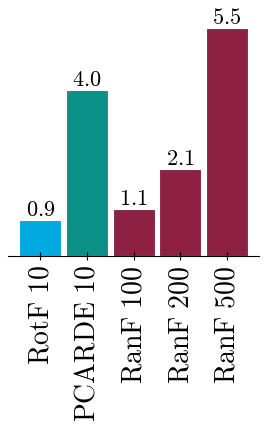

In [26]:
plot_times_algo_comp("hepmass", False)

#### Predicion times (in milliseconds) for EPSILON dataset

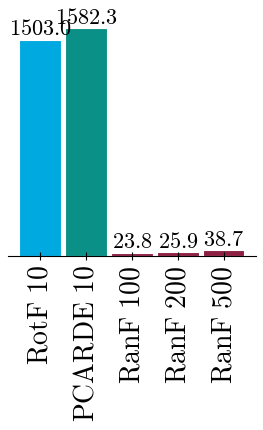

In [27]:
plot_times_algo_comp("epsilon", False)

#### Scalability study

In [28]:
def plot_times_scalability(training):
    mult, col = (1, "train_time") if training else (1000, "predict_time")
    time = speedup_comparison.set_index("workers")[col][1:].values*mult

    seablau4 = (0/255,169/255,224/255)
    xaxis = range(len(time))

    fig, ax = plt.subplots(figsize=(6,4))

    width = 0.9
    ax.bar(xaxis, time, width, color=[seablau4 for _ in xaxis], edgecolor = 'white')

    for x in xaxis:
        ax.text(x, time[x]+time.max()*0.02, r"$%s$"%np.around(time[x],1), horizontalalignment='center', fontsize=13)

    ax.margins(0.01,0.05)
    ax.set_xticks(xaxis)
    ax.set_xticklabels([r"$%s$"%i for i in [2,4,6,8,10,12,14,16,18,20,22,24]])

    ax.set_yticklabels([])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_ylim(time.min()-(time.max()*0.05),time.max())

    ax.tick_params(axis='both', which='major', labelsize=20, width=1, size=8, direction='inout')

    fig.patch.set_facecolor('w')
    fig.tight_layout()
    
def plot_speedup_scalability(training):
    col, yticks = ("train_time", [3, 5, 7, 9, 11]) if training else ("predict_time", [2, 5, 8, 11, 14, 17])
    speedup = speedup_comparison[(speedup_comparison["workers"] > 0)][col].apply(lambda x: speedup_comparison[(speedup_comparison["workers"] == 0)][col] / x)[0].values

    seablau4 = (0/255,169/255,224/255)
    bordeaux4 = (142/255,32/255,67/255)

    xaxis = range(len(speedup))

    fig, ax = plt.subplots(figsize=(6,4))

    width = 0.9
    ax.scatter(xaxis, speedup, color=seablau4, s=25, edgecolor = "none", zorder=10)
    ax.plot(xaxis, speedup, color=seablau4)

    ax.set_ylim([yticks[0]-1, yticks[4]-1])
    ax.margins(0.05,0.05)
    ax.set_xticks(xaxis)
    ax.set_xticklabels([r"$%s$"%i for i in [2,4,6,8,10,12,14,16,18,20,22,24]])


    ax.set_yticks(yticks)
    ax.set_yticklabels([r"$%s$"%i for i in yticks])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.tick_params(axis='both', which='major', labelsize=20, width=1, size=8, direction='inout')

    fig.patch.set_facecolor('w')
    fig.tight_layout()

##### Training times (in seconds) for each number of workers

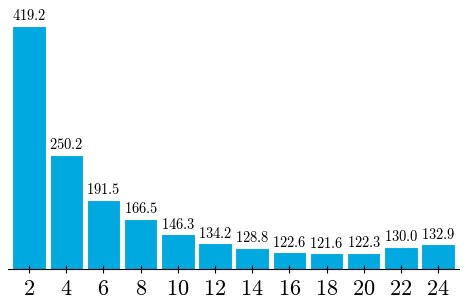

In [29]:
plot_times_scalability(True)

##### Prediction times (in milliseconds) for each number of workers

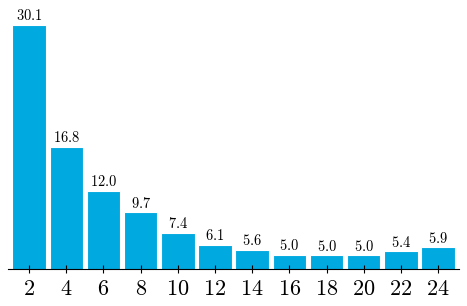

In [30]:
plot_times_scalability(False)

##### Training speedup

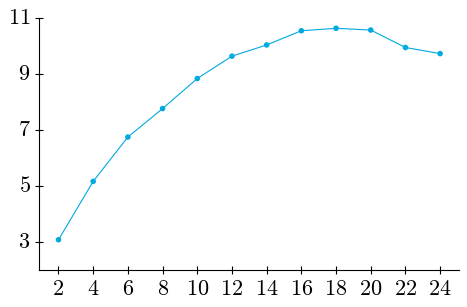

In [31]:
plot_speedup_scalability(True)

##### Prediction speedup

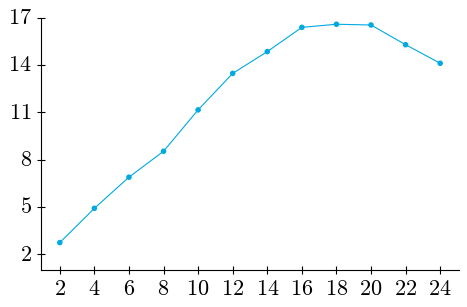

In [32]:
plot_speedup_scalability(False)

### Study of ensemble size

Bayesian comparisons of Rotation Forests of different sizes varying their number of rotations and number of trees.

The ensemble size is the number of rotations multiplied by the number of trees (i.e., $L \times T$)

In [33]:
rotf = res_algo_comparison[(res_algo_comparison["algorithm"] == "rotf")]

# the three sizes shaped for bayesian hierarchical tests
small = rotf[(rotf["num_rotations"] == 10)]["accuracy"].values.reshape((6,5))
medium = rotf[(rotf["num_rotations"] == 50)]["accuracy"].values.reshape((6,5))
large = rotf[(rotf["num_rotations"] == 100)]["accuracy"].values.reshape((6,5))

#### Small ($L = 10$, $T = 1$) vs Medium ($L = 50$, $T = 1$)

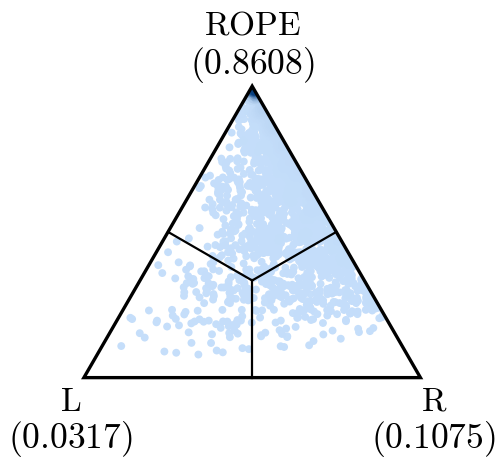

In [34]:
pos_small_vs_medium = bc.HierarchicalTest(small, medium, rope=0.01, nsamples=50000)
bplt.tern(pos_small_vs_medium)
plt.show()

#### Small ($L = 10$, $T = 1$) vs Large ($L = 100$, $T = 1$)

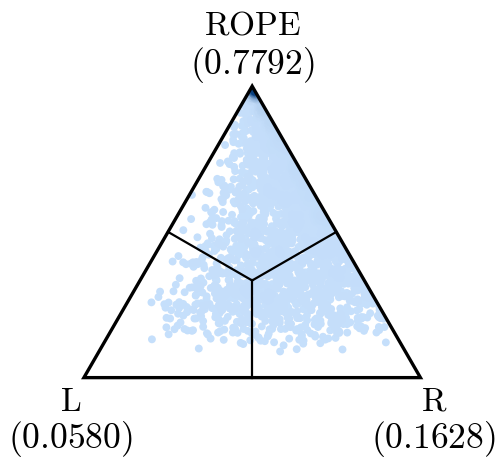

In [35]:
pos_small_vs_large = bc.HierarchicalTest(small, large, rope=0.01, nsamples=50000)
bplt.tern(pos_small_vs_large)
plt.show()

#### Medium ($L = 50$, $T = 1$) vs Large ($L = 100$, $T = 1$)

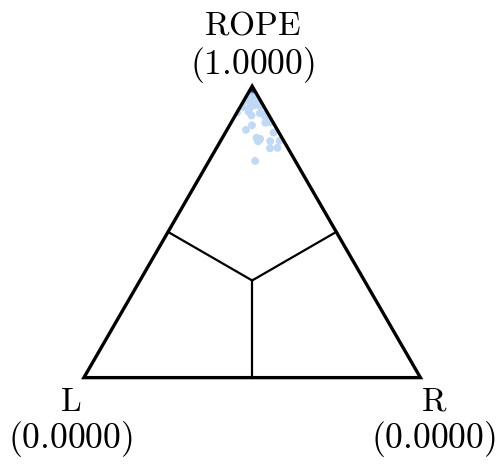

In [36]:
pos_medium_vs_large = bc.HierarchicalTest(medium, large, rope=0.01, nsamples=50000)
bplt.tern(pos_medium_vs_large)
plt.show()

#### Perserving ensemble size combining $L$ and $T$

In [37]:
# bootstrap size = 25
bs25 = res_variants_comparison[res_variants_comparison["bootstrap_size"] == 25]

r10t1  = bs25[(bs25["num_rotations"] == 10) & (bs25["num_trees"] == 1)]["accuracy"].values.reshape((6,5))
r5t2   = bs25[(bs25["num_rotations"] == 5) & (bs25["num_trees"] == 2)]["accuracy"].values.reshape((6,5))
r50t1  = bs25[(bs25["num_rotations"] == 50) & (bs25["num_trees"] == 1)]["accuracy"].values.reshape((6,5))
r10t5  = bs25[(bs25["num_rotations"] == 10) & (bs25["num_trees"] == 5)]["accuracy"].values.reshape((6,5))
r5t10  = bs25[(bs25["num_rotations"] == 5) & (bs25["num_trees"] == 10)]["accuracy"].values.reshape((6,5))
r100t1 = bs25[(bs25["num_rotations"] == 100) & (bs25["num_trees"] == 1)]["accuracy"].values.reshape((6,5))
r10t10 = bs25[(bs25["num_rotations"] == 10) & (bs25["num_trees"] == 10)]["accuracy"].values.reshape((6,5))
r5t20  = bs25[(bs25["num_rotations"] == 5) & (bs25["num_trees"] == 20)]["accuracy"].values.reshape((6,5))

##### Small: [$L = 10$, $T = 1$] vs [$L = 5$, $T = 2$]

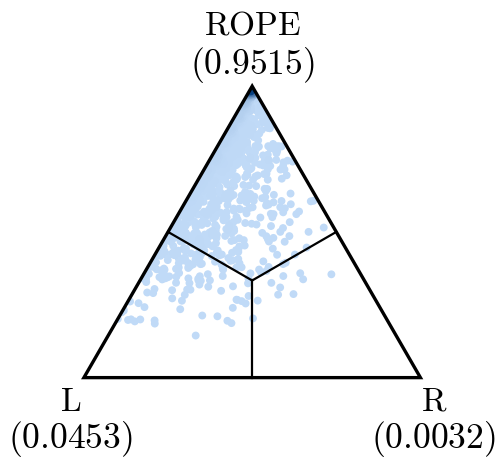

In [38]:
pos_r10t1_vs_r5t2 = bc.HierarchicalTest(r10t1, r5t2, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t1_vs_r5t2)
plt.show()

##### Medium: [$L = 50$, $T = 1$] vs [$L = 10$, $T = 5$]

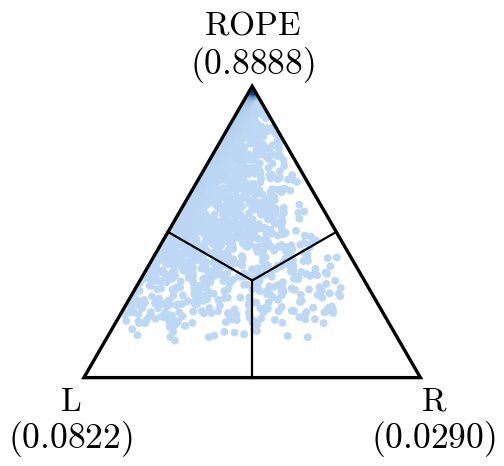

In [39]:
pos_r50t1_vs_r10t5 = bc.HierarchicalTest(r50t1, r10t5, rope=0.01, nsamples=50000)
bplt.tern(pos_r50t1_vs_r10t5)
plt.show()

##### Medium: [$L = 50$, $T = 1$] vs [$L = 5$, $T = 10$]

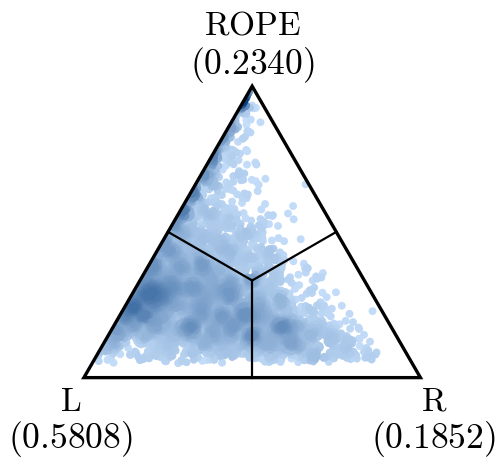

In [40]:
pos_r50t1_vs_r5t10 = bc.HierarchicalTest(r50t1, r5t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r50t1_vs_r5t10)
plt.show()

##### Medium: [$L = 10$, $T = 5$] vs [$L = 5$, $T = 10$]

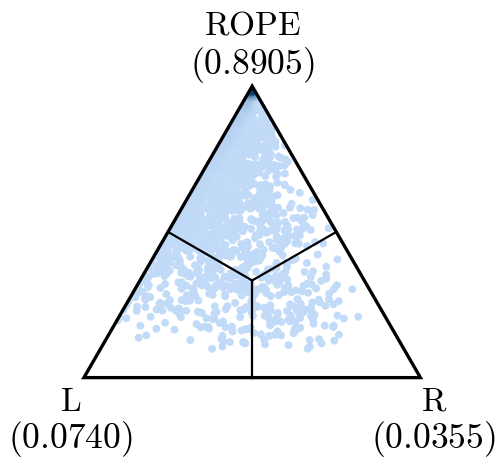

In [41]:
pos_r10t5_vs_r5t10 = bc.HierarchicalTest(r10t5, r5t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t5_vs_r5t10)
plt.show()

##### Large: [$L = 100$, $T = 1$] vs [$L = 10$, $T = 10$]

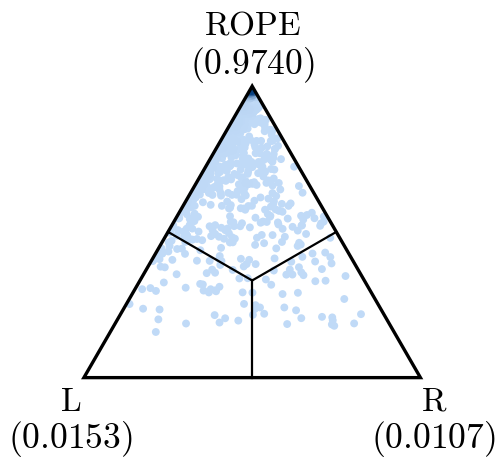

In [42]:
pos_r100t1_vs_r10t10 = bc.HierarchicalTest(r100t1, r10t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r100t1_vs_r10t10)
plt.show()

##### Large: [$L = 100$, $T = 1$] vs [$L = 5$, $T = 20$]

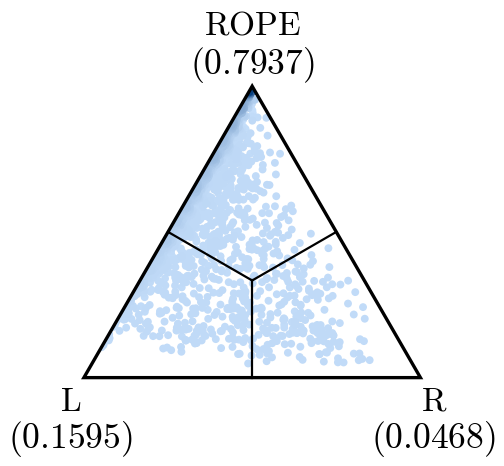

In [43]:
pos_r100t1_vs_r5t20 = bc.HierarchicalTest(r100t1, r5t20, rope=0.01, nsamples=50000)
bplt.tern(pos_r100t1_vs_r5t20)
plt.show()

##### Large: [$L = 10$, $T = 10$] vs [$L = 5$, $T = 20$]

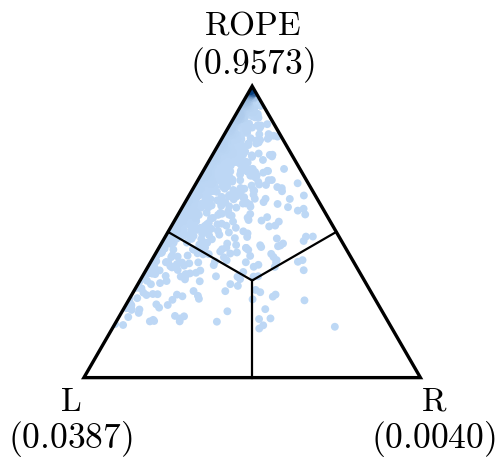

In [44]:
pos_r10t10_vs_r5t20 = bc.HierarchicalTest(r10t10, r5t20, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t10_vs_r5t20)
plt.show()

#### Fixed L, variable T
##### $L = 5$:  $T = 2$ vs $T = 10$

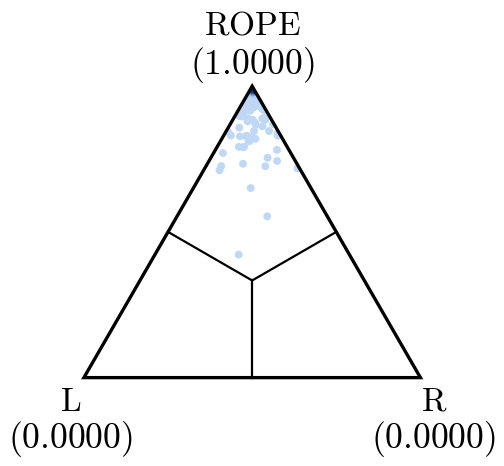

In [45]:
pos_r5t2_vs_r5t10 = bc.HierarchicalTest(r5t2, r5t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r5t2_vs_r5t10)
plt.show()

##### $L = 5$:  $T = 2$ vs $T = 20$

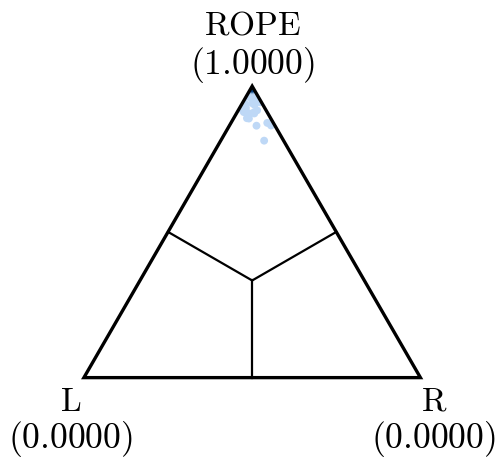

In [46]:
pos_r5t2_vs_r5t20 = bc.HierarchicalTest(r5t2, r5t20, rope=0.01, nsamples=50000)
bplt.tern(pos_r5t2_vs_r5t20)
plt.show()

##### $L = 5$:  $T = 10$ vs $T = 20$

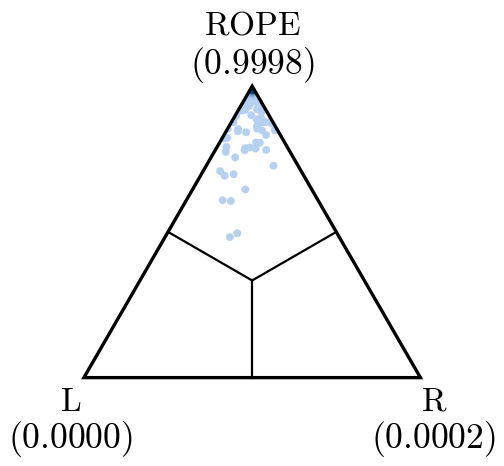

In [47]:
pos_r5t10_vs_r5t20 = bc.HierarchicalTest(r5t10, r5t20, rope=0.01, nsamples=50000)
bplt.tern(pos_r5t10_vs_r5t20)
plt.show()

##### $L = 10$:  $T = 1$ vs $T = 5$

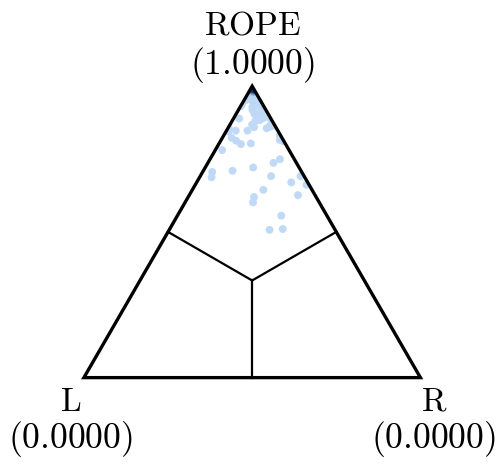

In [48]:
pos_r10t1_vs_r10t5 = bc.HierarchicalTest(r10t1, r10t5, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t1_vs_r10t5)
plt.show()

##### $L = 10$:  $T = 1$ vs $T = 10$

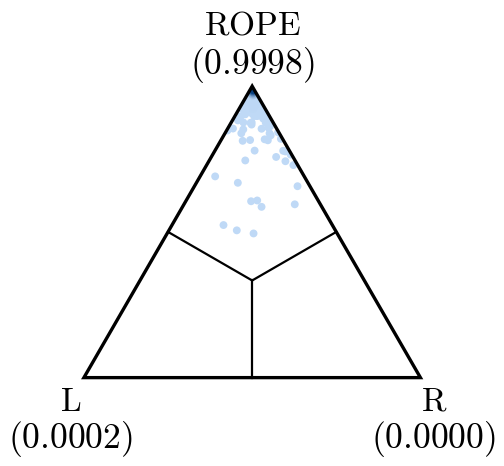

In [49]:
pos_r10t1_vs_r10t10 = bc.HierarchicalTest(r10t1, r10t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t1_vs_r10t10)
plt.show()

##### $L = 10$:  $T = 5$ vs $T = 10$

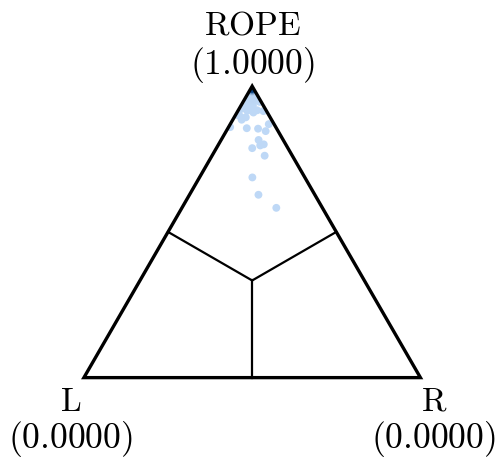

In [50]:
pos_r10t5_vs_r10t10 = bc.HierarchicalTest(r10t5, r10t10, rope=0.01, nsamples=50000)
bplt.tern(pos_r10t5_vs_r10t10)
plt.show()

#### L-T plots

A graphical representation of the influence of T over L and vice-versa. Mean accuracy for all folds of all datasets is depicted.

This plot was requested as part of the review process, but we found it **uninformative** and bit **misleading**, because what looks like great differences attending to surface color, in reality those differences are very small and statistically equivalent, as demonstrated with the previous bayesian comparisons. Thus, **it was not included in the publication**.

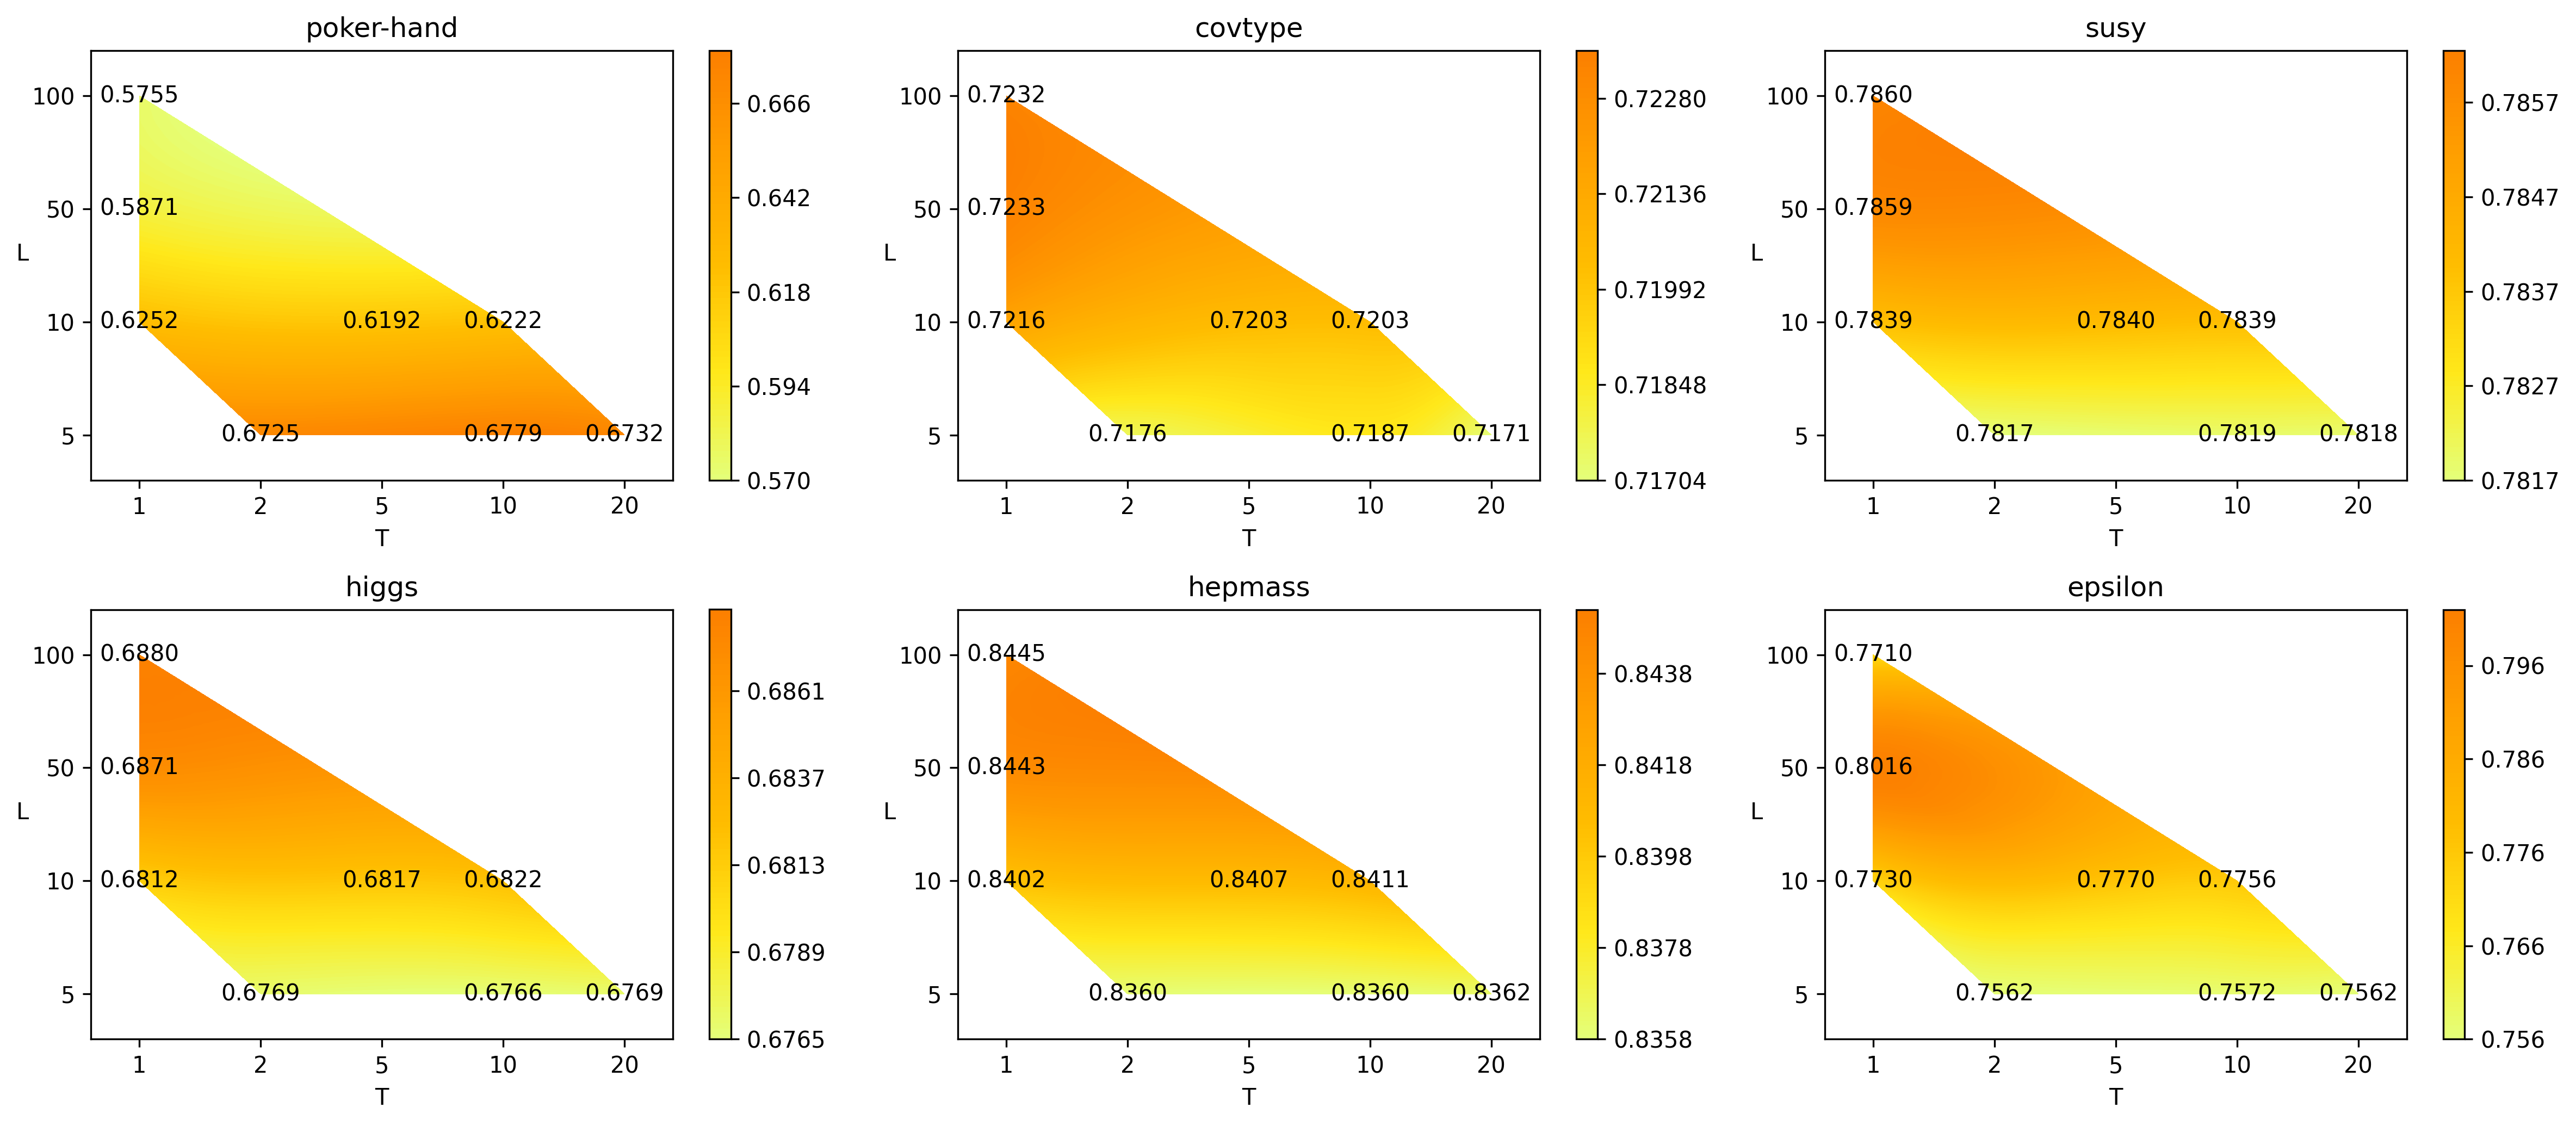

In [51]:
plt.style.use('default')

x = np.array([2,1,4,3,1,5,4,1])
y = np.array([1,2,1,2,3,1,2,4])

triang = mtri.Triangulation(x, y)
refiner = mtri.UniformTriRefiner(triang)

r = res_variants_comparison[res_variants_comparison["bootstrap_size"] == 25]

fig, axes = plt.subplots(2, 3, figsize=[16,7], dpi=300)
for d, ax in zip(['poker-hand','covtype','susy','higgs','hepmass','epsilon'], axes.flat):
    accs = []
    # size 10 (small)
    accs.append(np.mean(r[(r["num_rotations"] == 5) & (r["num_trees"] == 2) & (r["dataset"] == d)]["accuracy"]))
    accs.append(np.mean(r[(r["num_rotations"] == 10) & (r["num_trees"] == 1) & (r["dataset"] == d)]["accuracy"]))

    # size 50 (medium)
    accs.append(np.mean(r[(r["num_rotations"] == 5) & (r["num_trees"] == 10) & (r["dataset"] == d)]["accuracy"]))
    accs.append(np.mean(r[(r["num_rotations"] == 10) & (r["num_trees"] == 5) & (r["dataset"] == d)]["accuracy"]))
    accs.append(np.mean(r[(r["num_rotations"] == 50) & (r["num_trees"] == 1) & (r["dataset"] == d)]["accuracy"]))

    # size 100 (large)
    accs.append(np.mean(r[(r["num_rotations"] == 5) & (r["num_trees"] == 20) & (r["dataset"] == d)]["accuracy"]))
    accs.append(np.mean(r[(r["num_rotations"] == 10) & (r["num_trees"] == 10) & (r["dataset"] == d)]["accuracy"]))
    accs.append(np.mean(r[(r["num_rotations"] == 100) & (r["num_trees"] == 1) & (r["dataset"] == d)]["accuracy"]))
    
    tri_refi, z_test_refi = refiner.refine_field(accs, subdiv=4)

    tri = ax.tricontourf(tri_refi, z_test_refi, levels=100, cmap = cm.get_cmap(name='Wistia'))
    cbar = fig.colorbar(tri, ax=ax)
    cbar.ax.locator_params(nbins=5)

    margin=0.4
    ax.set_xlim(1 - margin, 5 + margin)
    ax.set_ylim(1 - margin, 4 + margin)

    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels([1, 2, 5, 10, 20])
    ax.set_yticks([1, 2, 3, 4])
    ax.set_yticklabels([5, 10, 50, 100])
    ax.set_xlabel('T')
    ax.set_ylabel('L', rotation=0)
    
    for x0, y0, s in zip(x, y, accs):
        ax.text(x0, y0, "%.4f"%round(s,4), horizontalalignment='center', verticalalignment='center')

    ax.set_title(d)
fig.tight_layout()

### Study of bootstrap influence

Comparisons between a bootstrap fixed to 10%, 25%, and 50% are shown.

In [52]:
rotf10_1 = res_variants_comparison[(res_variants_comparison["num_rotations"] == 10) & (res_variants_comparison["num_trees"] == 1)]

bs10  = rotf10_1[rotf10_1["bootstrap_size"] == 10]["accuracy"].values.reshape((6,5))
bs25  = rotf10_1[rotf10_1["bootstrap_size"] == 25]["accuracy"].values.reshape((6,5))
bs50  = rotf10_1[rotf10_1["bootstrap_size"] == 50]["accuracy"].values.reshape((6,5))

#### 10% vs 25%

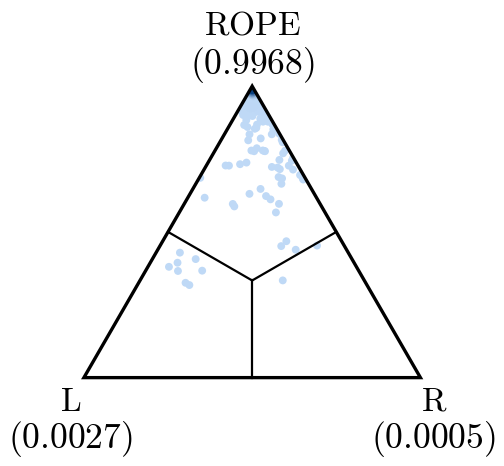

In [53]:
pos_bs10_vs_bs25 = bc.HierarchicalTest(bs10, bs25, rope=0.01, nsamples=50000)
bplt.tern(pos_bs10_vs_bs25)
plt.show()

#### 10% vs 50%

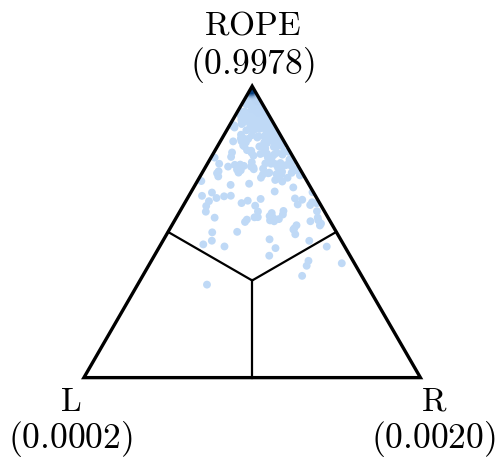

In [54]:
pos_bs10_vs_bs50 = bc.HierarchicalTest(bs10, bs50, rope=0.01, nsamples=50000)
bplt.tern(pos_bs10_vs_bs50)
plt.show()

#### 25% vs 50%

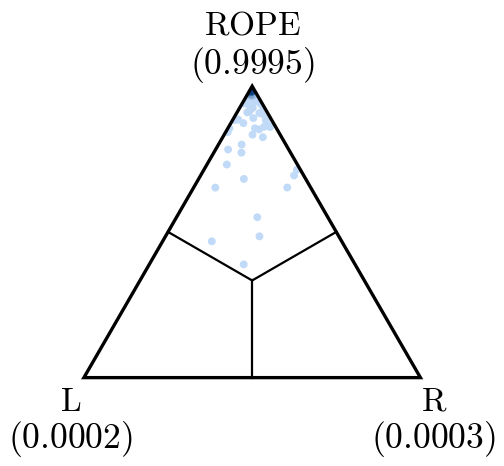

In [55]:
pos_bs25_vs_bs50 = bc.HierarchicalTest(bs25, bs50, rope=0.01, nsamples=50000)
bplt.tern(pos_bs25_vs_bs50)
plt.show()